In [1]:
# import the libraries
import numpy as np
from skimage import data, io
image = data.camera() # importing the cameraman image

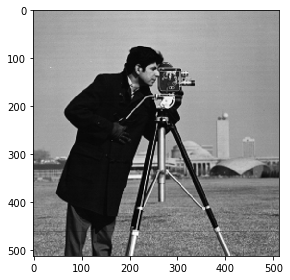

In [2]:
io.imshow(image)

1.	Geometric Transforms using inbuilt functions. Refer below for running the codes:

In [25]:
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage.transform import SimilarityTransform, AffineTransform

In [4]:
print(image)

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]


[[  1.  -0.  30.]
 [  0.   1. -50.]
 [  0.   0.   1.]]


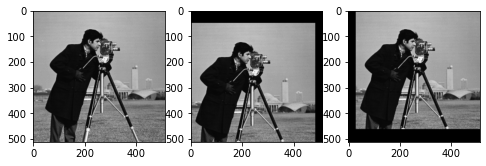

In [13]:
# a) Translation:

tform1 = SimilarityTransform(scale=1,translation=(30, -50)) 
print(tform1.params)

img1 = warp(image, tform1)
back_img1 = warp(img1, tform1.inverse)

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(image, cmap = 'gray')

fig.add_subplot(1, 3, 2)
plt.imshow(img1, cmap = 'gray')

fig.add_subplot(1, 3, 3)
plt.imshow(back_img1, cmap = 'gray')

b)	Scale, rotation, translation 

You can use the above functions for performing these three geometric transforms together.

About scaling:
(x’, y’) = (a*x, b*y) where (x’, y’) are new coordinates after scaling, (x, y) are original coordinates, a and b are scaling factors.


[[ 1.93185165 -0.51763809 10.        ]
 [ 0.51763809  1.93185165 10.        ]
 [ 0.          0.          1.        ]]


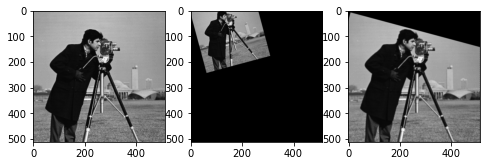

In [12]:
tform2 = SimilarityTransform(scale=2,rotation = np.pi / 12, translation=(10, 10)) 
print(tform2.params)

img2 = warp(image,tform2)
back_img2 = warp(img2, tform2.inverse)

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 3, 1)
plt.imshow(image, cmap = 'gray')

fig.add_subplot(1, 3, 2)
plt.imshow(img2, cmap = 'gray')

fig.add_subplot(1, 3, 3)
plt.imshow(back_img2, cmap = 'gray')

2.	Perform the following geometric transforms without using inbuilt functions.

a)	Apply the horizontal shear (shear parallel to the x axis) on the image with shear factor = 2. It converts the coordinates from (x,y) to the point (x+my, y) where m is the shear factor.

In [14]:
temp = image.copy()
print(temp)
img_hor = np.zeros((temp.shape[0] + 2 * temp.shape[1], temp.shape[0] + 2 * temp.shape[1]))

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]


In [24]:
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        img_hor[i + 2 * j][j] = temp[i][j]

In [16]:
print(img_hor)

[[156.   0.   0. ...   0.   0.   0.]
 [156.   0.   0. ...   0.   0.   0.]
 [158. 157.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


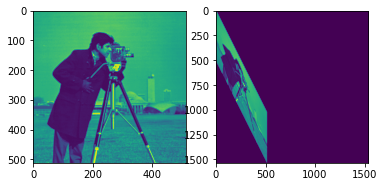

In [17]:
fig, axs = plt.subplots(ncols = 2)
axs[0].imshow(temp)
axs[1].imshow(img_hor)

In [20]:
temp = image.copy()
print(temp)
img_vert = np.zeros((3 * temp.shape[0] + temp.shape[1], 3 * temp.shape[0] + temp.shape[1]))

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]


In [21]:
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        img_vert[i][3 * i + j] = temp[i][j] 

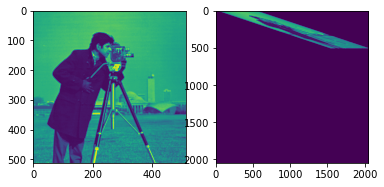

In [22]:
fig, axs = plt.subplots(ncols = 2)
axs[0].imshow(temp)
axs[1].imshow(img_vert)

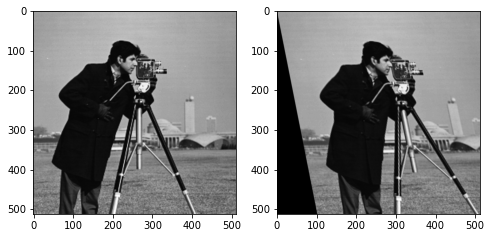

In [32]:
# horizontal shear using inbuilt function

img = data.camera()
affine_tf = AffineTransform(shear=0.2)
img_shear = warp(img, inverse_map=affine_tf)

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.imshow(img_shear, cmap = 'gray')


3.Add salt and pepper noise to your input image using inbuilt function in Matlab/Python such as imnoise in Matlab. This noise is caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.

In [44]:
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = data.camera() 
noise_img = sp_noise(image,0.05)
cv2.imwrite("sp_noise.png", noise_img)

True

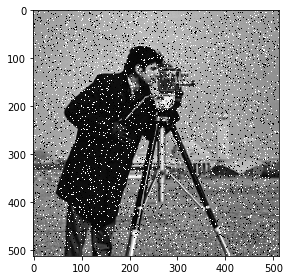

In [45]:
# displaying the image with salt and pepper noise.
io.imshow("sp_noise.png")

a) Write a program to implement spatial domain median filter to remove salt and pepper noise without using inbuilt functions. For every 3X3 area, find the median of the pixels and replace the center pixel by the median. 

In [47]:
import cv2 
import numpy as np  
img_noisy1 = cv2.imread('sp_noise.png', 0) # 0 for grayscale image
m, n = img_noisy1.shape  
img_new1 = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
cv2.imwrite('median_filtered.png', img_new1)

True

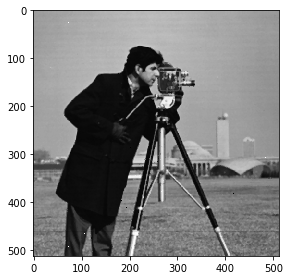

In [48]:
# removing salt and pepper noise via median filtering
io.imshow('median_filtered.png')

b) Apply mean filtering as well on noisy image and find out which filter gives better result for salt and pepper noise.

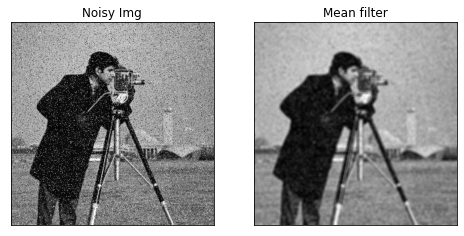

In [52]:
imgm = cv2.imread('sp_noise.png', 0)

new_image = cv2.blur(imgm,(8, 8))
plt.figure(figsize=(8, 8))
plt.subplot(121), plt.imshow(imgm, cmap='gray'),plt.title('Noisy Img')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()